<a href="https://colab.research.google.com/github/janvipargai1/Fraud-detection-ML-model/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
duplicates=df.duplicated().sum()
duplicates

np.int64(1081)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(283726, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
df.shape

(283726, 31)

In [13]:
class_count=df['Class'].value_counts()
class_count

,count
Class,
0,283253
1,473


/tmp/ipython-input-14-3961760392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_count.index,y=class_count.values,palette='coolwarm')


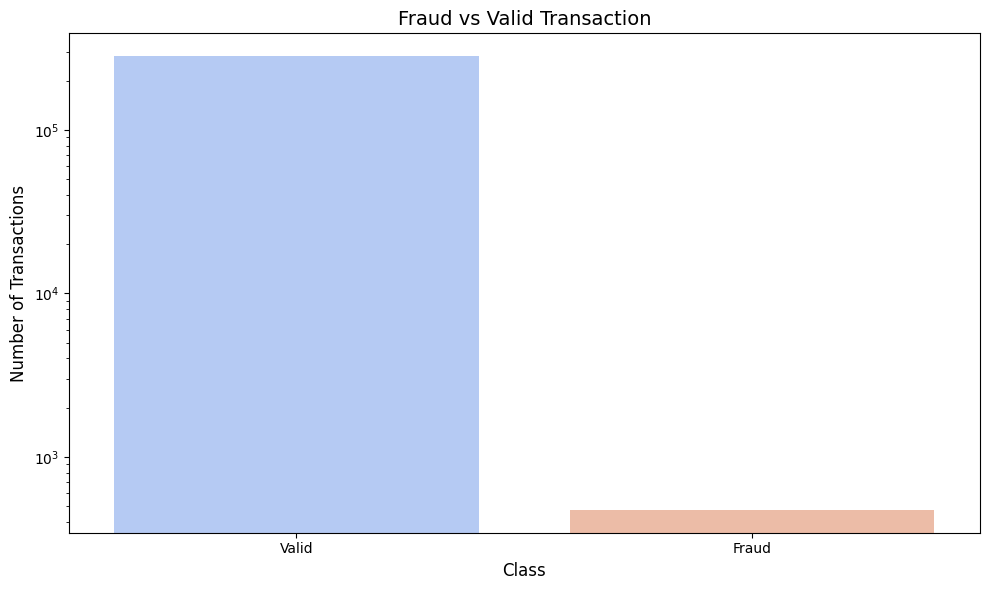

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=class_count.index,y=class_count.values,palette='coolwarm')
plt.title('Fraud vs Valid Transaction',fontsize=14)
plt.yscale('log')
plt.xlabel('Class',fontsize=12)
plt.ylabel('Number of Transactions',fontsize=12)
plt.xticks(ticks=class_count.index,labels=['Valid','Fraud'],fontsize=10)
plt.tight_layout()
plt.show()


In [15]:
#get fraud and normal dataset
fraud=df[df['Class']==1]
normal=df[df['Class']==0]

In [16]:
print(fraud.value_counts().sum())
print(normal.value_counts().sum())


473
283253


In [17]:
print(fraud.shape,normal.shape)

(473, 31) (283253, 31)


In [18]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [19]:
normal.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


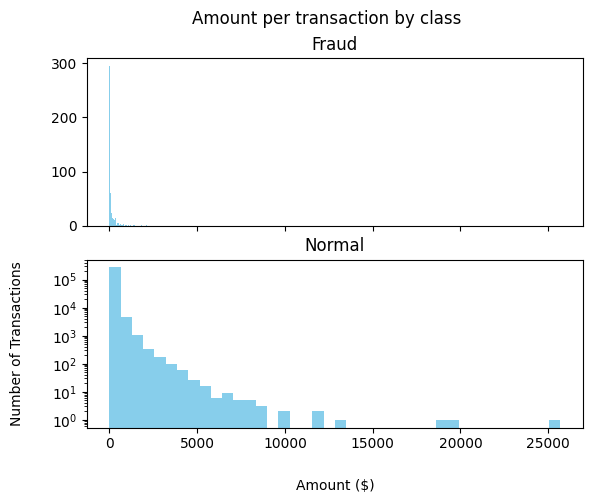

In [20]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=40
ax1.hist(fraud.Amount,bins=bins,color='skyblue')
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins,color='skyblue')
ax2.set_title('Normal')
plt.xlabel('Amount ($)',labelpad=20)
plt.ylabel('Number of Transactions',labelpad=20)
plt.yscale('log')
plt.show()

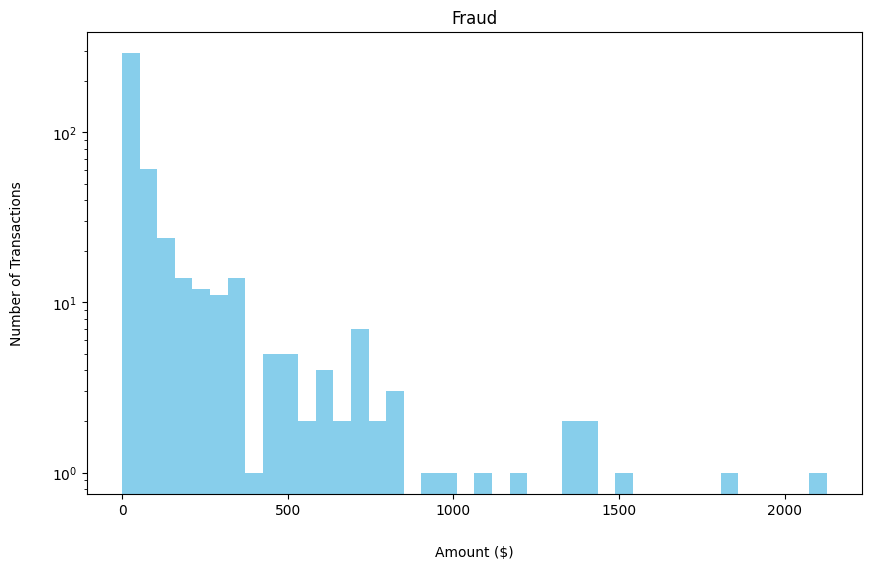

In [21]:
plt.figure(figsize=(10,6))
plt.hist(fraud['Amount'],bins=40,color='skyblue')
plt.title('Fraud')
plt.xlabel('Amount ($)',labelpad=20)
plt.ylabel('Number of Transactions',labelpad=20)
plt.yscale('log')
plt.show()

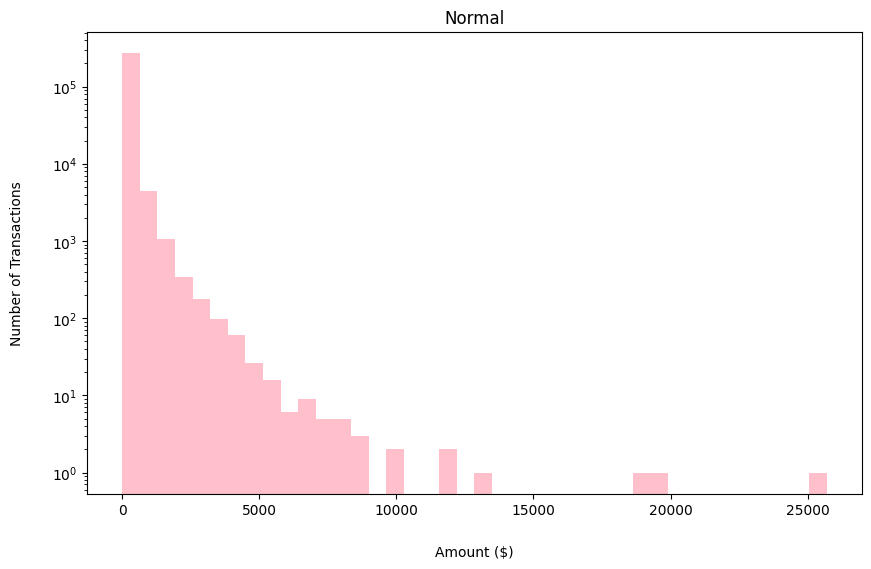

In [22]:
plt.figure(figsize=(10,6))
plt.hist(normal['Amount'],bins=40,color='pink')
plt.title('Normal')
plt.xlabel('Amount ($)',labelpad=20)
plt.ylabel('Number of Transactions',labelpad=20)
plt.yscale('log')
plt.show()

In [23]:
df.groupby(['Class','Time'])['Amount'].sum()

Class  Time    
0      0.0         152.31
       1.0         502.16
       2.0          73.66
       4.0           4.99
       7.0         134.00
                    ...  
1      169142.0    390.00
       169347.0      0.76
       169351.0     77.89
       169966.0    245.00
       170348.0     42.53
Name: Amount, Length: 124947, dtype: float64

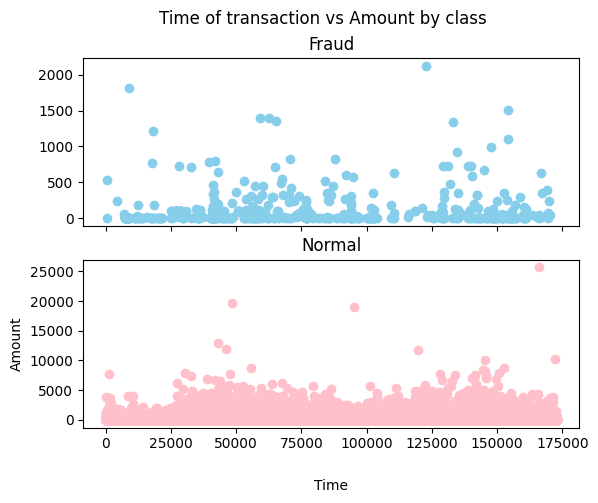

In [24]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time,fraud.Amount,color='skyblue')
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount,color='pink')
ax2.set_title('Normal')
plt.xlabel('Time',labelpad=20)
plt.ylabel('Amount')
plt.show()

In [25]:
corre=df.corr()

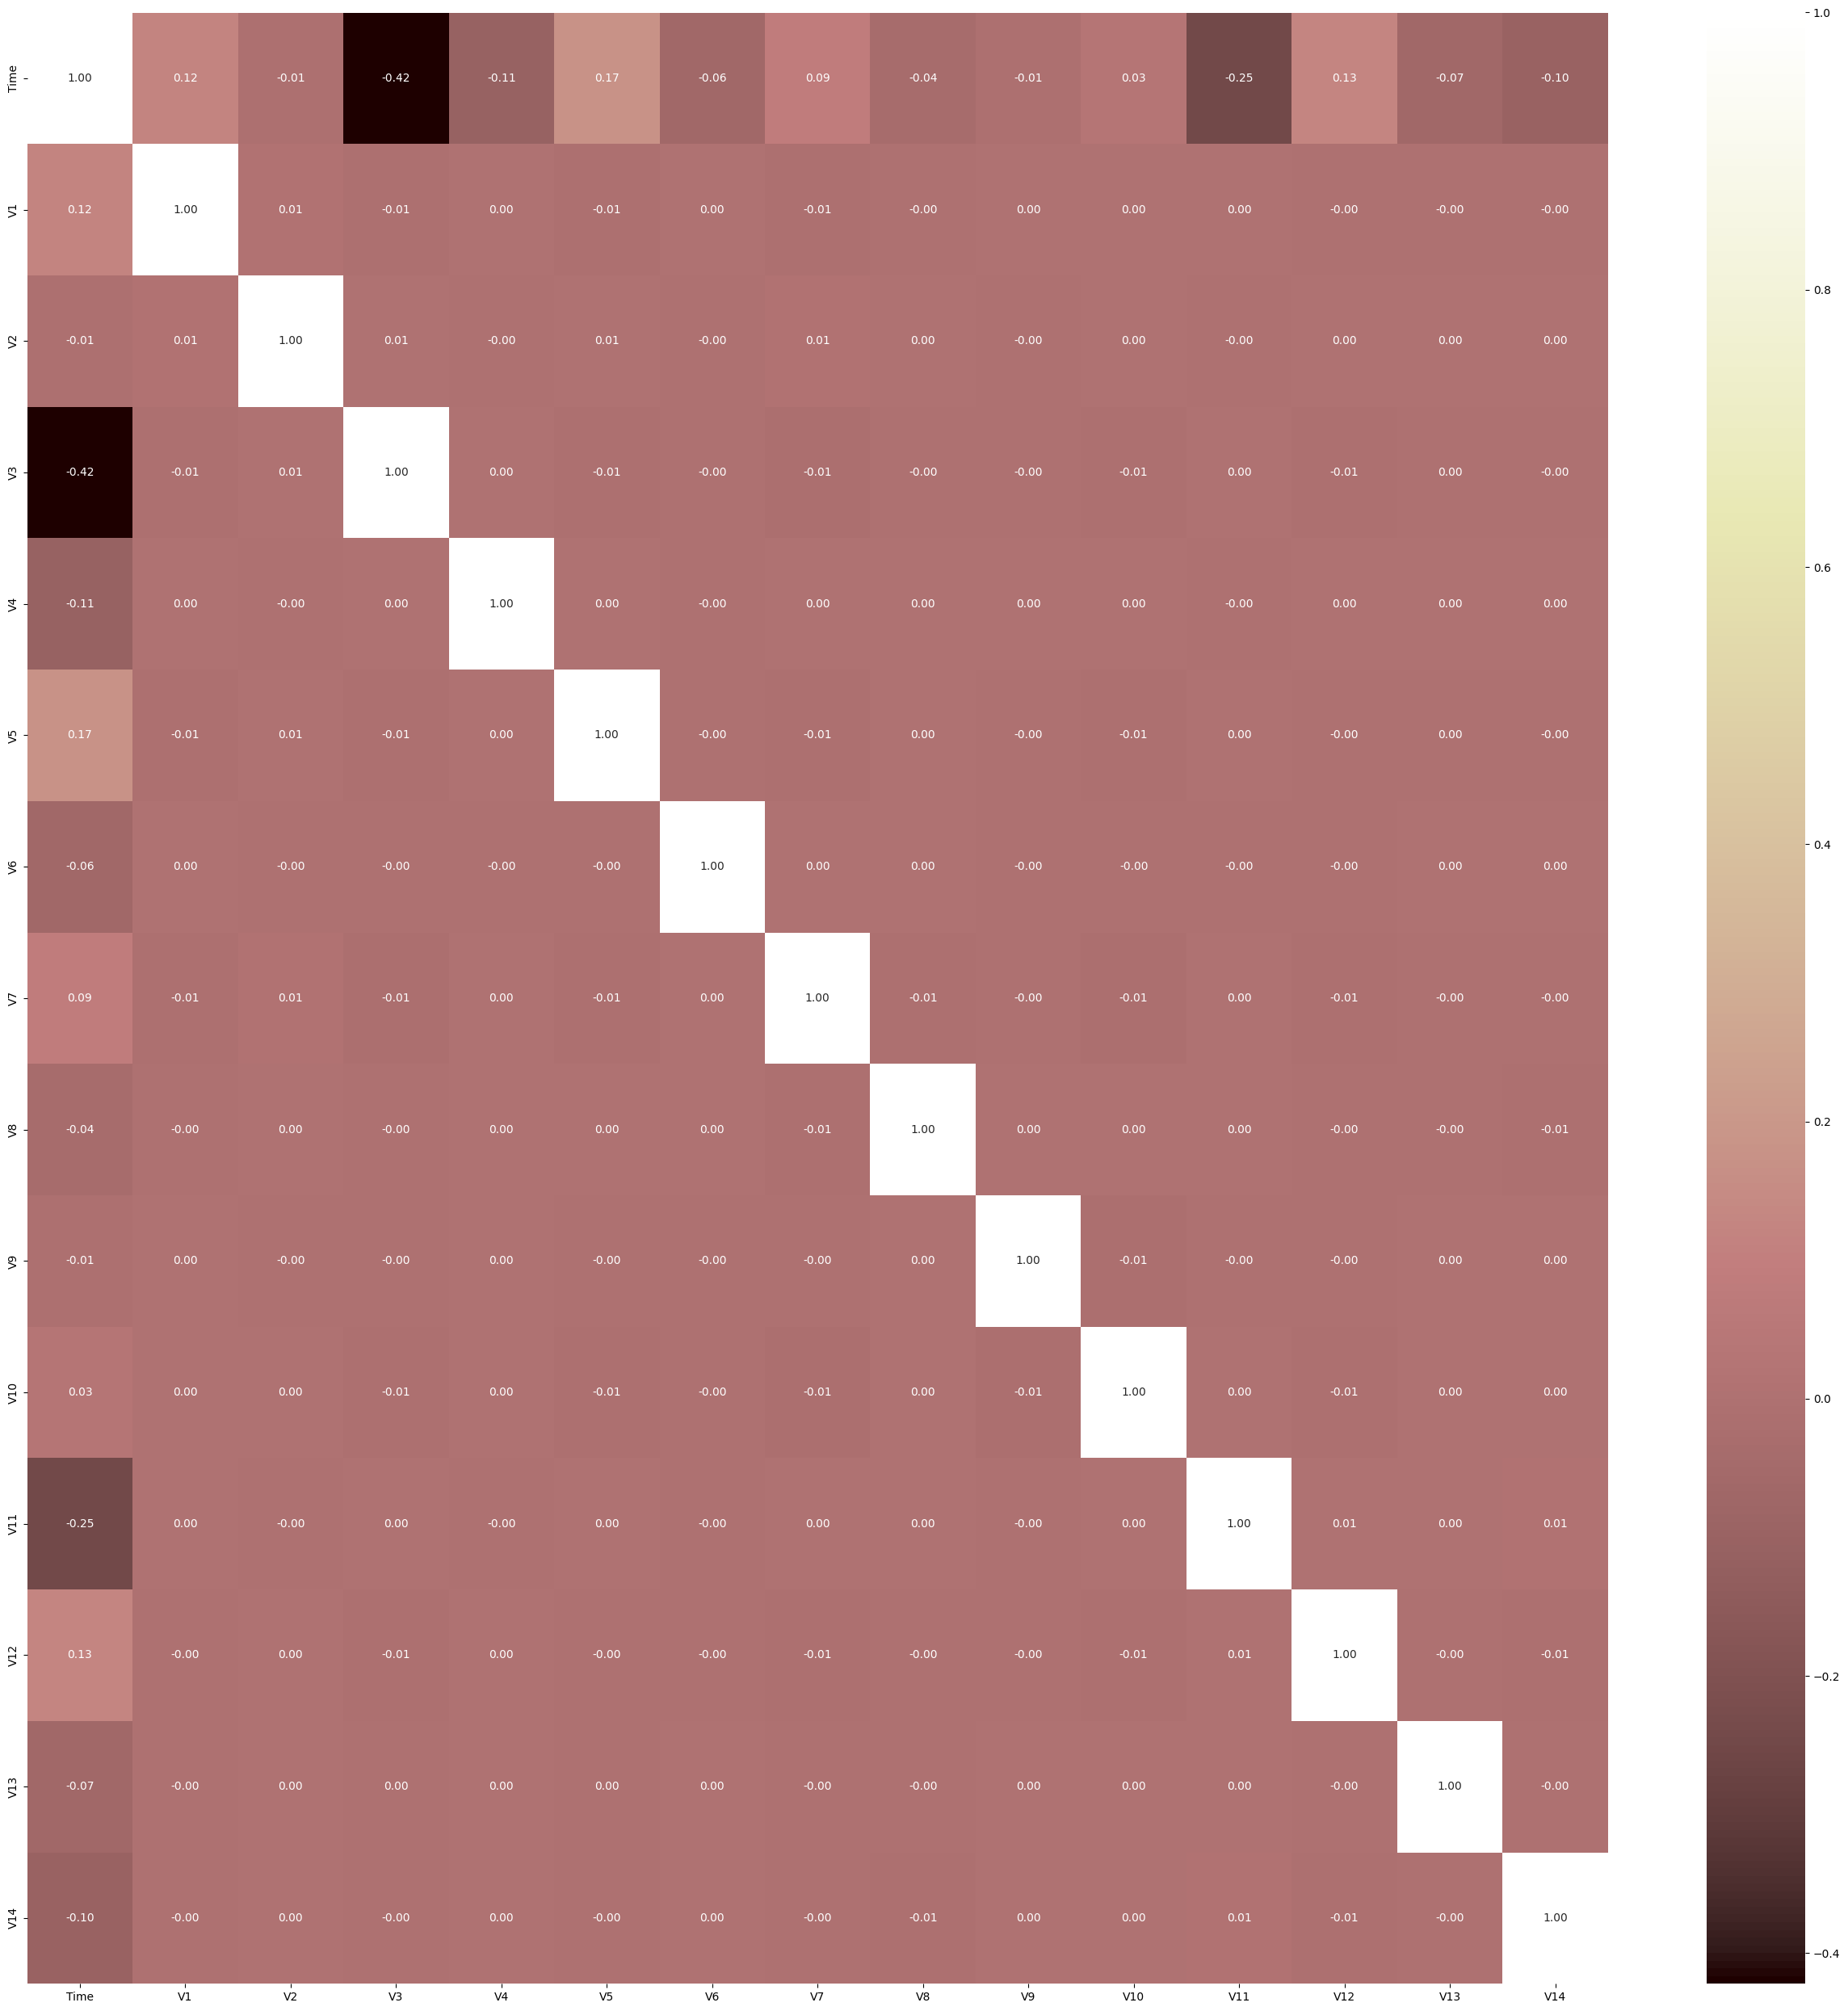

In [26]:
top_corr_features=corre.index[0:15]
plt.figure(figsize=(25,25))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='pink',fmt='.2f',annot_kws={'size':10})
plt.tight_layout()
plt.show()

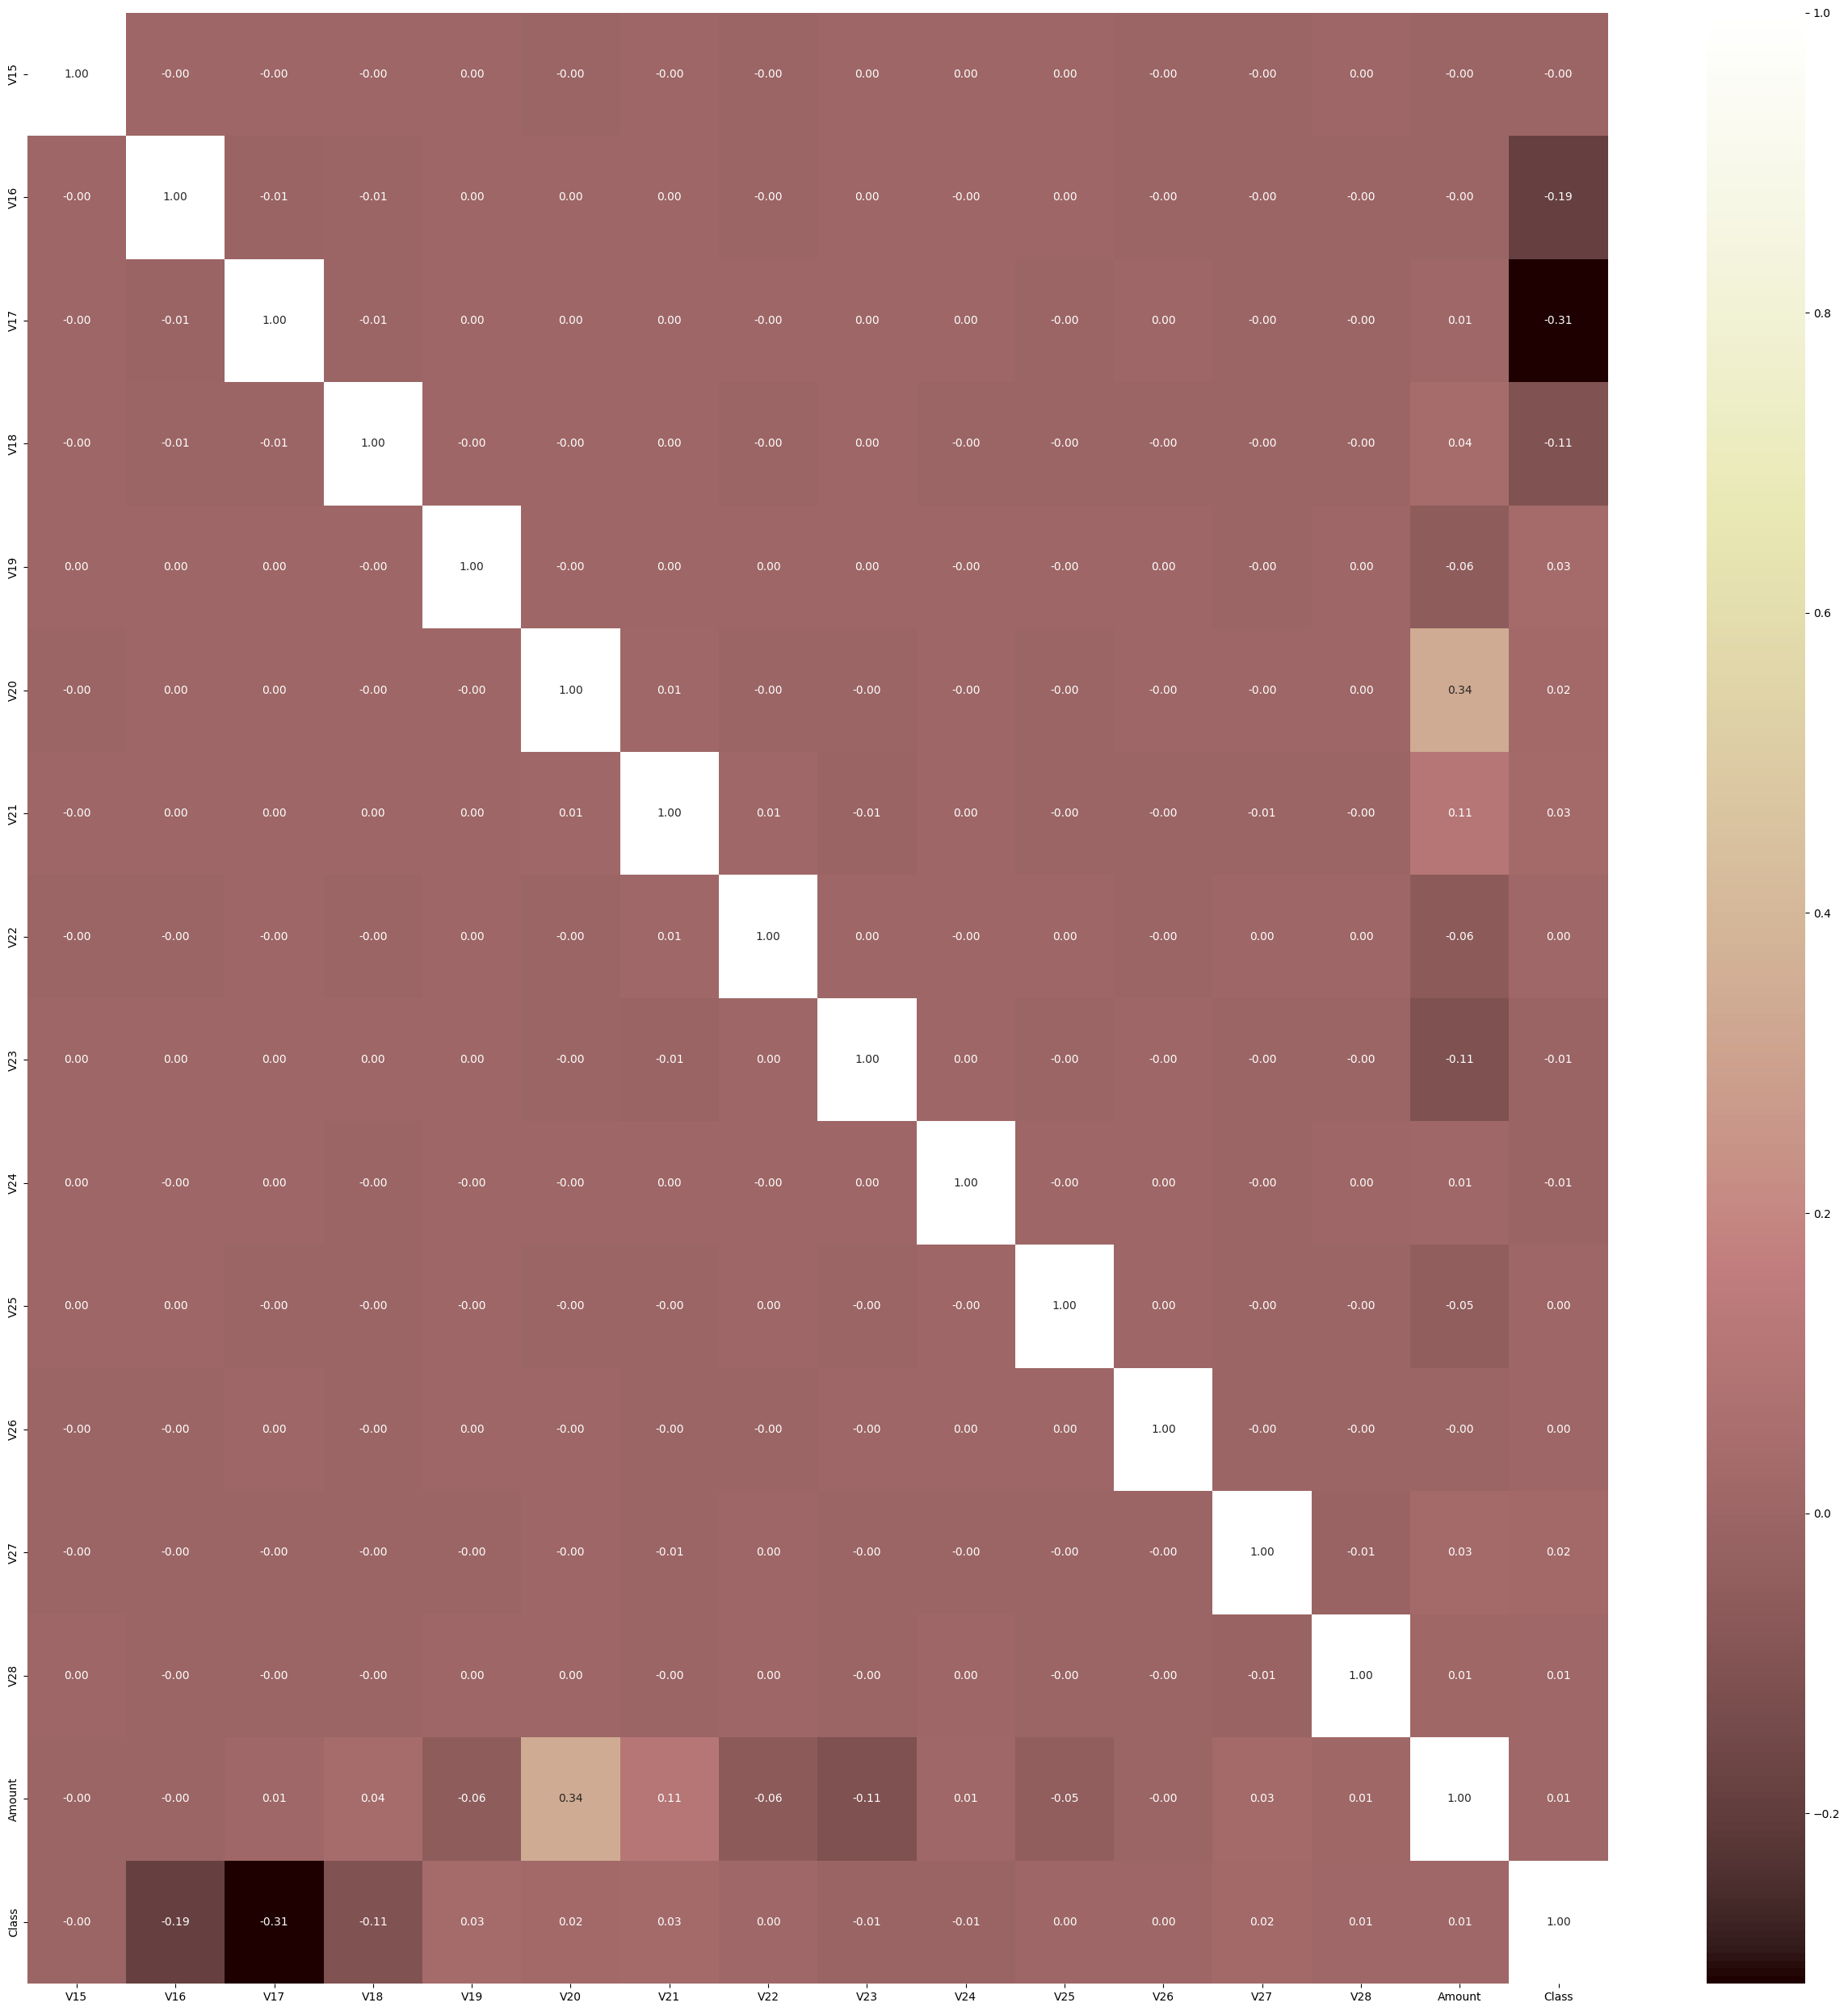

In [27]:
top_corr_features=corre.index[15:31]
plt.figure(figsize=(25,25))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='pink',fmt='.2f',annot_kws={'size':10})
plt.tight_layout()
plt.show()

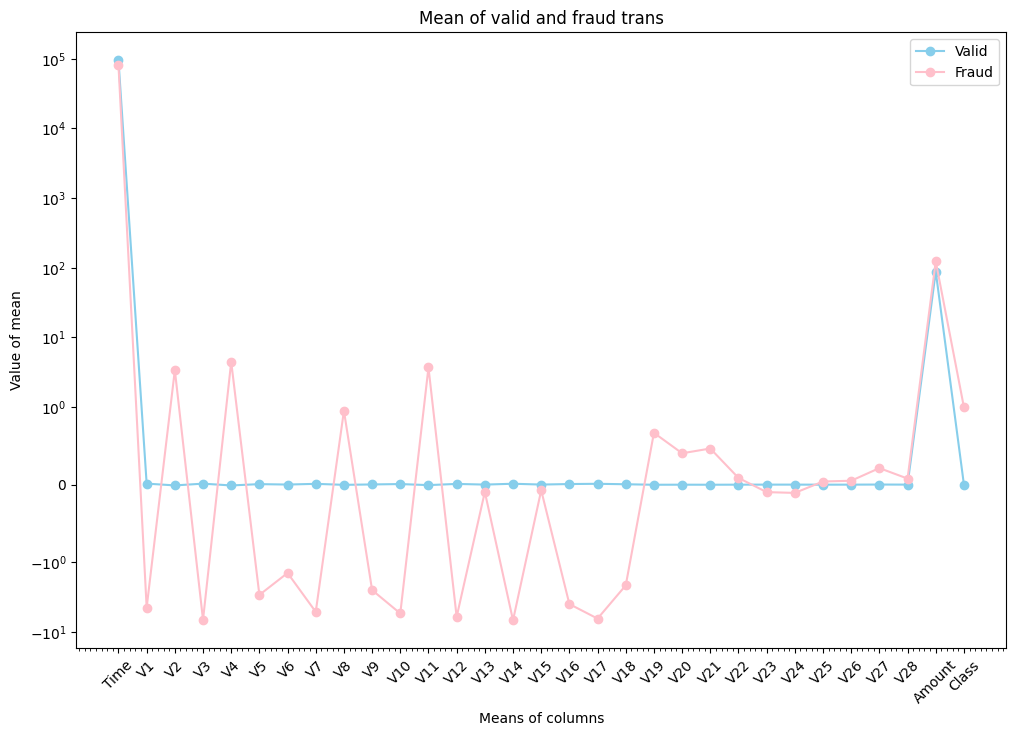

In [28]:
x=df[df['Class']==0].mean()
y=df[df['Class']==1].mean()
plt.figure(figsize=(12,8))
plt.plot(x,marker='o',linestyle='-',color='skyblue',label='Valid',markersize=6)
plt.plot(y,marker='o',linestyle='-',color='pink',label='Fraud',markersize=6)
plt.title("Mean of valid and fraud trans")
plt.minorticks_on()
plt.yscale('symlog',linthresh=1)
plt.xlabel("Means of columns")
plt.ylabel("Value of mean")
plt.xticks(rotation=45)
plt.legend()

plt.show()


In [29]:
#making the model
input=df.drop(columns='Class',axis=1)
output=df['Class']
print(input)
print(output)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(input,output,test_size=0.2,stratify=output,random_state=2)
print(input.shape,X_train.shape,X_test.shape)

(283726, 30) (226980, 30) (56746, 30)


In [33]:
logistic_model=LogisticRegression(max_iter=10000)
logistic_model.fit(X_train,Y_train)

logistic_train_predict=logistic_model.predict(X_train)
logistic_test_predict=logistic_model.predict(X_test)

logistic_train_accuracy=accuracy_score(logistic_train_predict,Y_train)
logistic_test_accuracy=accuracy_score(logistic_test_predict,Y_test)

print(f"Accuracy on training data:{logistic_train_accuracy}")
print(f"Accuracy on testing data:{logistic_test_accuracy}")

Accuracy on training data:0.9991981672394044
Accuracy on testing data:0.9992774821132767


In [34]:
new_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sample data credit card.csv")

In [35]:
new_predictions=logistic_model.predict(new_data)
print(new_predictions)

[0 0 0 ... 0 0 0]


In [37]:
unique_predictions=np.unique(new_predictions)
print("Unique predictions:",unique_predictions)

Unique predictions: [0 1]


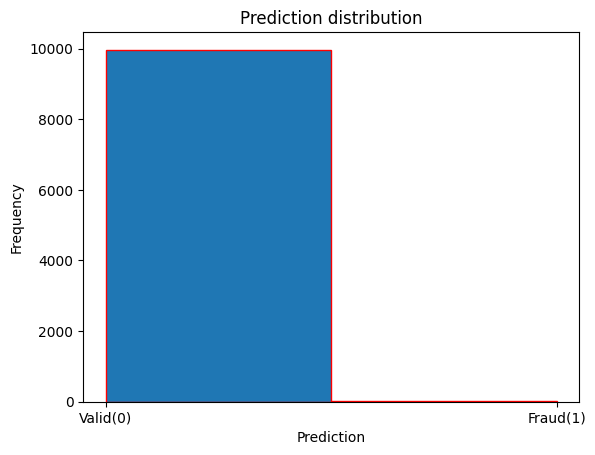

In [41]:
plt.hist(new_predictions,bins=2,edgecolor="red")
plt.xticks([0,1],labels=["Valid(0)","Fraud(1)"])
plt.xlabel("Prediction")
plt.ylabel("Frequency")
plt.title("Prediction distribution")
plt.show()

In [42]:
count_0=0
count_1=0
for pred in new_predictions:
  if pred==0:
    count_0+=1
  elif pred==1:
    count_1+=1

print(f"Number of valid predictions:{count_0}")
print(f"Number of fraud predictions:{count_1}")

Number of valid predictions:9967
Number of fraud predictions:32


In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,logistic_test_predict)
print("\nClassification report:\n",classification_report(Y_test,logistic_test_predict))
print(cm)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.65      0.75        95

    accuracy                           1.00     56746
   macro avg       0.94      0.83      0.88     56746
weighted avg       1.00      1.00      1.00     56746

[[56643     8]
 [   33    62]]
